In [1]:
# sigmoid curve fitting is from the https://gist.github.com/andrewgiessel/5684769
# good discussion here:  http://stackoverflow.com/questions/4308168/sigmoidal-regression-with-scipy-numpy-python-etc

## Import dependecies and define fuctions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
from scipy.optimize import fsolve
from sklearn.metrics import r2_score

In [3]:
# Define the opwer function
# define a : rate_constant, b: exponent c:logistic Intercept
def power(x, a, b, c):
    return a * (x)**b + c


# define fit fuction

def fit_power(x, y):
    # nonlinear least squares curve fitting with sigmoid fuction
    # bounds are the Lower and upper bounds on parameters. Important to avoid the covariance error
    
    (a_, b_, c_), _ = opt.curve_fit(power, x, y, bounds=([0, -2, 0], [1, 2., 5]))

    #print a, b, c values
    print ("a_(rate_constant): " + str(a_),  "  b_(exponent): " + str(b_), "  c_(Intercept): " + str(c_))


    # fitting with sigmoid fuction
    y_fit = power(x, a_, b_, c_)

    print('R^2: ', r2_score(y_fit, y))



    # plot with 10- 90% window
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(x, y, 'ro')
    ax.plot(x, y_fit, 'b-')
    plt.xlabel("Radius (nm)", fontsize=14)
    plt.ylabel('Width   (nm)', fontsize=14)
    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)
    plt.xlim([0, 40])

    return


## Import data and assign the x, y values 

In [4]:
# import csv data
df= pd.read_csv('time_width.csv') 

In [5]:
df.shape

(8, 11)

In [6]:
df.describe()

,time,Radius,R_err,Ni,Ni_err,Al,Al_err,Cr,Cr_err,Re,Re_err
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,170.656250,9.488164,2.443530,1.521931,0.115995,1.766320,0.052471,1.991971,0.078488,2.052752,0.105291
std,355.666902,9.429036,2.145400,0.302045,0.101478,0.140674,0.049564,0.109146,0.083858,0.496257,0.078320
min,0.000000,1.057415,0.251052,1.239100,0.007498,1.598728,0.007976,1.881328,0.012125,1.456402,0.024230
25%,0.812500,2.855657,1.087890,1.268798,0.031093,1.684221,0.011638,1.919962,0.015127,1.607174,0.032595
50%,10.000000,6.242870,1.855000,1.434684,0.080328,1.734930,0.029348,1.944114,0.039421,2.054757,0.100782
75%,112.000000,12.752500,3.355000,1.703453,0.219830,1.836962,0.097181,2.058662,0.122242,2.372741,0.147822
max,1024.000000,28.457725,6.630000,2.040853,0.259986,2.022094,0.123236,2.191606,0.238989,2.806858,0.229952


## Obtain Ni, Al, Re values using the for-loop 


 Element Ni
a_(rate_constant): 0.9999999999999999   b_(exponent): -0.577106196266544   c_(Intercept): 1.0897418516919524
R^2:  0.9559848150356792

 Element Al
a_(rate_constant): 0.5316186253675038   b_(exponent): -0.4663974731875923   c_(Intercept): 1.5036202864875934
R^2:  0.9562988699687732

 Element Re
a_(rate_constant): 0.999999999999931   b_(exponent): 0.26816584236426283   c_(Intercept): 0.3842359229481981
R^2:  0.9765304862864661


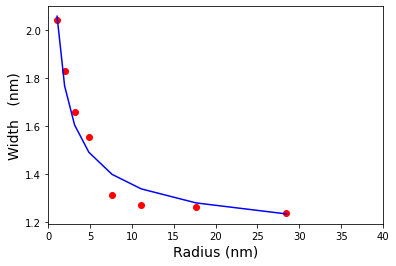

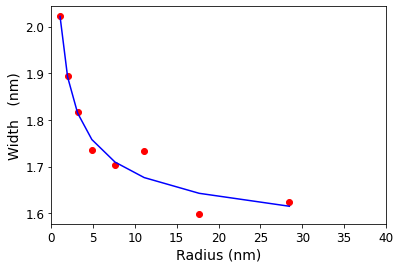

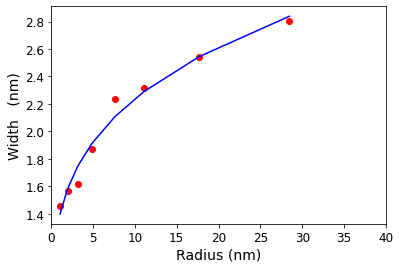

In [7]:
# maximun, Minimum, 90%, 10%, x-widthe using for-loop 
for i in ['Ni', 'Al', 'Re']:
    # assigne x and y values
    x = df['Radius'].to_numpy()
    y = df[i].to_numpy()
    print("\n Element", i)
    fit_power(x, y)

## Obtain Cr values with offset

In [8]:
# Define the opwer function for Cr
# define a : rate_constant, b: exponent c:logistic Intercept, x0: offset

x0 = 4
def power(x, a, b, c, x0):
    return a * (x-x0)**b + c



# define fit fuction

def fit_power(x, y):
    # nonlinear least squares curve fitting with sigmoid fuction
    # bounds are the Lower and upper bounds on parameters. Important to avoid the covariance error
    
    (a_, b_, c_), _ = opt.curve_fit(power, x, y, bounds=([0, -2, 0], [1, 2., 5]))

    #print a, b, c values
    print ("a_(rate_constant): " + str(a_),  "  b_(exponent): " + str(b_), "  c_(Intercept): " + str(c_))


    # fitting with sigmoid fuction
    y_fit = power(x, a_, b_, c_)

    print('R^2: ', r2_score(y_fit, y))



    # plot with 10- 90% window
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(x, y, 'ro')
    ax.plot(x, y_fit, 'b-')
    plt.xlabel("Radius (nm)", fontsize=14)
    plt.ylabel('Width   (nm)', fontsize=14)
    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)
    plt.xlim([0, 40])

    return


In [9]:
# maximun, Minimum, 90%, 10%, x-widthe using for-loop 
for i in ['Cr']:
    # assigne x and y values
    x = df['Radius'].to_numpy()
    y = df[i].to_numpy()
    print("\n Element", i)
    fit_power(x, y)


 Element Cr


TypeError: power() missing 1 required positional argument: 'x0'